# Проект для интернет-магазина

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования:** выявить определяющие успешность игры закономерности

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**План работы**
1. Загрузка данных, общая информация о них.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Портрет пользователя по регилнам.
5. Проверка гипотез.
6. Общий вывод.


### Шаг 1. Изучение общей информации

In [2]:
# импортируем библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

import warnings
warnings.simplefilter("ignore")


In [3]:
# загрузим данные

try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод**

Таблица состоит почти из 17 тысяч строк и 11 столбцов. 

В ней содержатся данные по компьютерным играм за 2016 год, такие как наименование, год выпуска, жанры, продажы в Северной Америке (na), Европе (eu), Японии (jp) и других странах мира (миллионы копий), оценки критиков и пользователей, а также рейтинг от организации ESRB.

Что необходимо доработать на начальном этапе:
* наименования столбцов привести к стандартному змеиному стилю (а именно исправить регистр)
* в некоторых столбцах меняем тип данных, например в столбце с годом выпуска
* наименования игр, жанров и платформ приводим в нижний регистр

### Шаг 2. Подготовка данных

**2.1 Замена названия столбцов (приводим названия к нижнему регистру)**

In [4]:

df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
# приведем информацию в столбцах name и genre в нижний регистр

df['name'] = df['name'].str.lower()
df['genre'] = df['genre'].str.lower()
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**2.2 Обработка пропусков**

Начнем с пропусков, потому что далее будем менять тип данных, а пропуски будут нам мешать.

In [6]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
# проверим 2 строки с пропущенными названиями

df_name = df[df['name'].isna()]
display(df_name)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Пропуски в названии совпадают с пропусками в жанре, убираем 2 эти строки.**

In [8]:
df.dropna(subset=['name'], axis=0, inplace=True)

Проверили сколько пропущенных значений содержиться в датасете.
Не так много столбцов задето. Если поле имя и жанр совпадают по пропускам (всего 2 NaN-а), то эти две строки можем удалить. 269 пропуска в годах выпуска, обработаем их по возможности.

А вот с рейтингом и оценками пользователей и критиков стоит подумать, очень много значений может повлиять на половину таблицы и качественный анализ.

In [9]:
# замена пропусков year_of_release

df['year_of_release'] = df['year_of_release'].fillna(df.groupby('name')['year_of_release'].transform('median'))
print(df.isna().sum())
print()

#количество уникальных значений где year_of_release не определен

df_test = df[df['year_of_release'].isna()]
print(df_test['year_of_release'].value_counts().sum())
print()

# проверяем продажи копий

df_test_pivot = df_test.pivot_table(index='genre', values=['na_sales', 'eu_sales',
       'jp_sales', 'other_sales'])
display(df_test_pivot)
print()

# удаление строк с пропусками в годах

df.dropna(subset=['year_of_release'], axis=0, inplace=True)
print(df.isna().sum())
print()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

0



,eu_sales,jp_sales,na_sales,other_sales
genre,,,,
action,0.057407,0.047407,0.196667,0.014815
adventure,0.035556,0.006667,0.415556,0.013333
fighting,0.162857,0.028571,0.308571,0.062857
misc,0.094667,0.004667,0.372000,0.068667
platform,0.053333,0.013333,0.117778,0.008889
puzzle,0.027143,0.090000,0.168571,0.004286
racing,0.080000,0.005385,0.111538,0.022308
role-playing,0.029286,0.109286,0.049286,0.011429
shooter,0.031667,0.005000,0.157500,0.008333



name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64



Половину пропусков по годам выпуска заменили на медианные значения по названиям игр. Оставшиеся 146 значений - уникальны. Рискнем и удалим эти строки, так как для всего датасета это менее 1% данных и, если посмотреть на сводную по жанрам из этой выборки, мы видим, что средние продажи данных игр составляют меньше миллиона копий.

In [10]:
# замена пропусков rating

df['rating'] = df['rating'].fillna('undefind')

Итого у нас остаются пробелы только в оценках и рейтинге. Причинами пропущенных значений в столбце 'rating' могут быть не обновленные данные, сбои при получении данных, неподдерживаемые форматы, ошибки машины и прочее. Иправить ситуацию можно запросив у коллег корректные данные. Сейчас можно заменить NaN-ы в столбце 'rating' на "undefind".

In [11]:
# проверим сколько строк в critic_score с нулевым значением

df.loc[df['critic_score']==0.0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [12]:
print(df.isna().sum())
df['critic_score'] = df['critic_score'].fillna(0.0)

df_critics = df[df['critic_score'].isna()]
print(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating                0
dtype: int64
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6633
rating                0
dtype: int64


Касательно оценок, можно предположить, что данные были утеряны при импорте файла, или же критики пропустили графу "Оценить". Исключая пропуски, в таблице нет значений равных нулю. Предположим, что оценки не были проставлены и заменим пропуски в critic_score на 0.

In [13]:
# проверим сколько строк в user_score с нулевым значением

df.loc[df['user_score']==0.0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = 0.0

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,0.0,NaN,undefind
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,0.0,NaN,undefind
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016.0,action,0.00,0.00,0.01,0.00,0.0,NaN,undefind
16711,lma manager 2007,X360,2006.0,sports,0.00,0.01,0.00,0.00,0.0,NaN,undefind
16712,haitaka no psychedelica,PSV,2016.0,adventure,0.00,0.00,0.01,0.00,0.0,NaN,undefind
16713,spirits & spells,GBA,2003.0,platform,0.01,0.00,0.00,0.00,0.0,NaN,undefind


Помимо пропусков в столбце с оценкой пользователей встречается аббревиатура 'tbd'. Запрос в поисковике выдал расшифровку аббревиатуры как "To Be Determined" - "будет определено". Используется, если какая-то информация еще не определена. Т.е. в нашем случае оценки пользователей еще не обработаны или не собраны. Таких значений в нашей таблице 2 394 строк.

Если мы прежположим, что сейчас у нас нет реальной возможности получить обновленные данные по оценкам пользователей, то мы можем считать эти значения равными 0. По данному столбцу также нет нулевых значений. Заменили все 'tbd' на 0.

In [15]:
# закончим с обработкой пропусков по оценкам пользователей

data_users = df[df['user_score'].isna()]

print('Уникальных значений:', len(data_users['name'].unique()))
print()

df['user_score'] = df['user_score'].fillna(0)
print(df.isna().sum())

Уникальных значений: 5730

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


Так же как и с критиками, пропуски могут быть просто не заполненными значениями: игру приобрело мало людей и оценки не были просталены. Проверим по уникальным играм, можем ли мы заменить NaN-ы в оценках пользователей на нулевые значения. 5 730 не повторяющихся игр, проставляем нули.

**2.3 Преобразование данных в нужные типы.**

На данном этапе меняем тип данных только в столбце с годом выпуска. Данные по продажам представлены в миллионах копий т.е. значения после запятой - тысячи они немаловажны. Данные по оценкам чаще всего представляются как дробные числа и "хвосты" этих дробей могут повлиять на общую картину.

In [16]:
df['year_of_release'] = df['year_of_release'].astype(int, errors='ignore')
df['user_score'] = df['user_score'].astype(float, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Вывод**

На этапе подготовки данных мы обработали почти всю таблицу:

* Названия столбцов приведены к общему стилю.
* Наименования игр и их жанры переведены в нижний регистр (на случай если в данных есть дубликаты в разных регистрах).
* Пропуски. Строк, в которых отсутствовали названия и жанры две, поэтому мы их удалили, так как их продажи не сильно бы повлияли на анализ. Пропущенные значения в столбце с годами выпуска заменили на медианные по группам из названий, а оставшиеся удалили (146 строк). NaN-ы ESRB заполнили значениями 'undefind', возможно некоторые игры еще не получили свой рейтинг. Данные без оценки критиков получили нули, без оценки пользователей заполнены все нулями. 
По оценкам было два предположения: либо пропуски случайны по каким-то техническим причинам, либо игры и правда были не оценены. В первом случае мы можем запросить корректные данные у коллег, но у нас нет такой возможности, а убирать все эти пропуски из таблицы, значит потерять половину данных. Поэтому мы попробуем поработать с вариантом "пропуски в оценках - на самом деле пропуски".
* Также попалась аббревиатура в оценках пользователей 'tbd'. Пришли к выводу что этих оценок пока что нет, но будут позже. Поэтому пока что заполняем нулями.
* Последнее, что поменяли это типы данных. По-моему мнению замену типа данных явно требует только столбец с годами выпуска.

**2.4 Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец**

In [17]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,undefind,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,undefind,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16711,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,0.0,0.0,undefind,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16713,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,0.0,0.0,undefind,0.01


### Шаг 3. Проведение исследовательского анализа данных 

**3.1 Проверим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [18]:
data_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
data_years

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


С 1980 по 1993 года выпускалось не так много игр, за год меньше 100 наименований. Следовательно можно рассматривать данные с 1994 года по 2016.

**3.2 Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [19]:
data_platform = df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
data_platform.reset_index(inplace=True)

display(data_platform.sort_values(['all_sales'], ascending=False))

,platform,all_sales
16,PS2,1247.16
28,X360,966.61
17,PS3,935.19
26,Wii,903.31
4,DS,804.28
15,PS,727.58
18,PS4,314.14
6,GBA,313.73
19,PSP,293.57
13,PC,258.86


Резкий переход по самым крупным продажам заметен от платформы PS (727.58) к платформе PS4 (314.00). Чтобы сильно не нагружать график, можно взять первые 6 платформ и поработать с ними.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,mezase!! tsuri master ds,DS,2009,sports,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16704,plushees,DS,2008,simulation,0.01,0.00,0.00,0.00,0.0,0.0,E,0.01
16709,score international baja 1000: the official game,PS2,2008,racing,0.00,0.00,0.00,0.00,0.0,0.0,undefind,0.00
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01


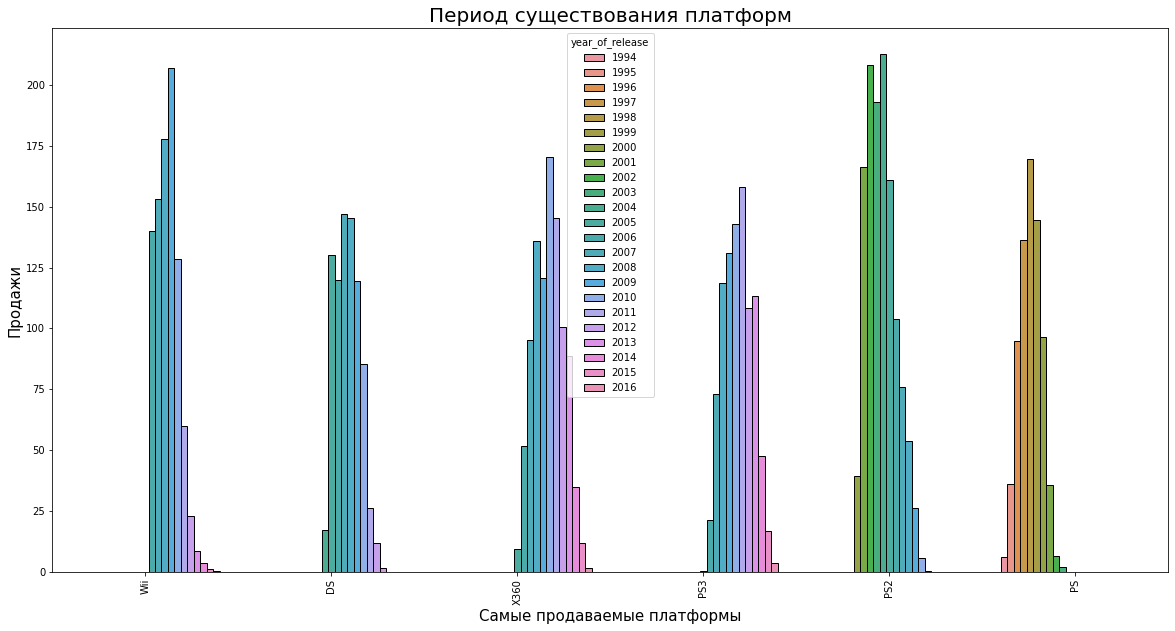

In [20]:
# сделаем выборку для платформ

data_big_platform = df.query('year_of_release >= 1994 and ("PS2" in platform \
                               or "X360" in platform or "PS3" in platform \
                               or "Wii" in platform or "DS" in platform or "PS" in platform)')

display(data_big_platform)

plt.figure(figsize=(20,10))

sns.barplot(x='platform', y='all_sales', hue='year_of_release', \
            estimator = np.sum, data=data_big_platform, ci=0, ec='black')
plt.title('Период существования платформ', fontsize=20)
plt.xlabel('Самые продаваемые платформы', fontsize=15)
plt.ylabel('Продажи', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Платформы Wii, DS, X360, PS3 использовались примерно в одно время, начиная с 2004-2005 годов и к 2011-2012 годам начинают исчезать. 

Платформа PS2 появилась раньше, примерно в 2000 году, соответственно и исчезла раньше предыдущих, в 2008 году уже пошла на спад и в 2012 году ее уже нет. 

Касательно PS, она сама старая из 6 рассматриваемых платформ. По имеющимся у нас данным, эта платформа начала использоваться в 1994 году. В 1997-1999 годах пик продаж игр на этой платформе, после она пошла на спад и к 2004 году пропала вовсе.

На основе общей картины можно сделать вывод, что примерно каждые 5-7 лет производители меняют платформы для игр

**3.3 Какие платформы лидируют по продажам, растут или падают?**

Судя по графику пик продаж наступает примерно спустя 4-6 лет после релиза. То есть, если мы берем 2016 год, возьмем период 2011-2016.

In [22]:
# сделаем еще одну выборку

data_stat = df[df['year_of_release'] >= 2011]
data_stat = data_stat[data_stat['year_of_release'] <= 2016]
data_stat

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,grand theft auto v,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,call of duty: modern warfare 3,X360,2011,shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,call of duty: black ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,0.0,0.0,undefind,14.63
33,pokemon x/pokemon y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,0.0,0.0,undefind,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16707,aiyoku no eustia,PSV,2014,misc,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16710,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01
16712,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,0.0,0.0,undefind,0.01


Построим сводную и график, чтобы выбрать самые прибыльные платформы за  выбранный период.

,platform,all_sales
4,PS3,447.69
10,X360,382.75
5,PS4,314.14
0,3DS,258.21
11,XOne,159.32
2,PC,98.67
8,Wii,96.39
9,WiiU,82.19
7,PSV,53.81
1,DS,39.54


<AxesSubplot:xlabel='platform'>

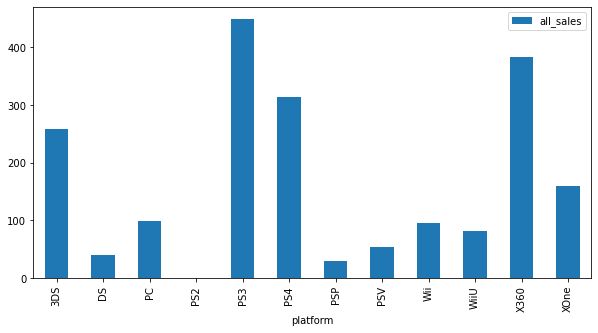

In [23]:
data_stat_pvt = data_stat.pivot_table(index='platform', values='all_sales', aggfunc='sum')
data_stat_pvt.reset_index(inplace=True)

data_stat_pvt.columns = ['platform', 'all_sales']

data_stat_pvt
display(data_stat_pvt.sort_values(['all_sales'], ascending=False))

data_stat_pvt.plot(x='platform', y='all_sales', kind='bar', figsize=(10,5))

Итого получаем: самые продаваемые платформы за последние 6 лет это '3DS', 'PS3', 'PS4', 'X360'. 

platform,year_of_release,3DS,PS3,PS4,WiiU,X360
0,2011,63.20,157.98,NaN,NaN,145.23
1,2012,51.76,108.28,NaN,17.56,100.72
2,2013,56.57,113.25,25.99,21.65,88.58
3,2014,43.76,47.76,100.00,22.03,34.74
4,2015,27.78,16.82,118.90,16.35,11.96
5,2016,15.14,3.60,69.25,4.60,1.52


Index(['year_of_release', '3DS', 'PS3', 'PS4', 'WiiU', 'X360'], dtype='object', name='platform')

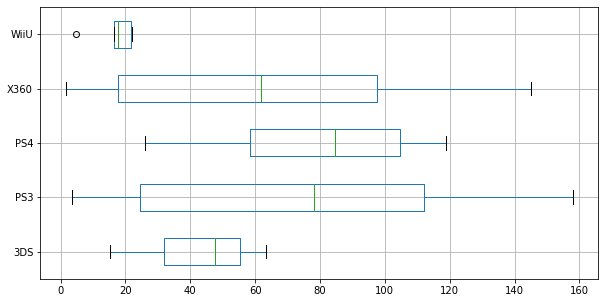

In [24]:
platforms_list = ['3DS', 'PS3', 'PS4', 'X360', 'WiiU']

data_new = data_stat.query('platform == @platforms_list')

data_new_pvt = data_new.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')
data_new_pvt.reset_index(inplace=True)

display(data_new_pvt)

# посмотрим на диаграмму размаха
data_new_pvt.boxplot(platforms_list, vert=0, figsize=(10,5))
data_new_pvt.columns

Для того чтобы построить графики, сгруппирвали таблицу по годам и платформам. 

По диаграмме размаха можем определить серидинное значение продаж каждой платформы:
* X360 - продажи в среднем состовляют чуть больше 60 млн копий
* PS4 - около 85 млн копий
* PS3 - около 80 млн копий
* 3DS - около 45 млн копий

<AxesSubplot:xlabel='year_of_release'>

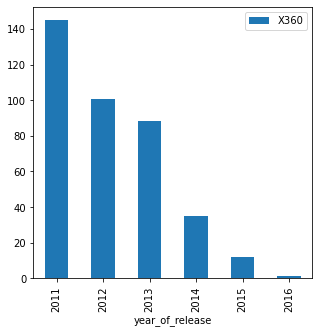

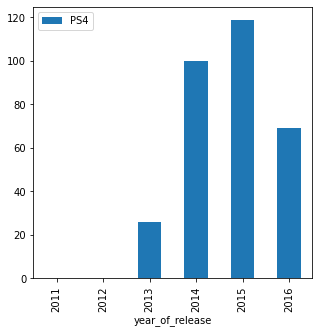

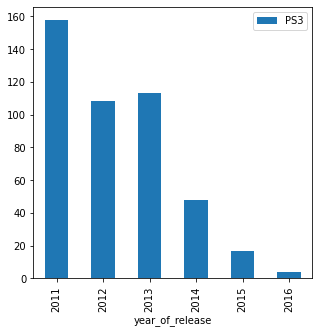

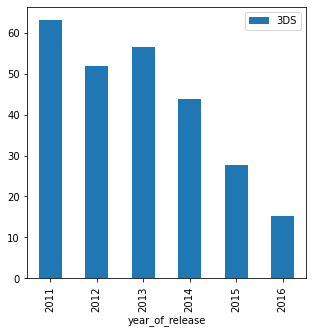

In [25]:
# построим график для каждой платформы
data_new_pvt.plot(x='year_of_release', y='X360', kind='bar', figsize=(5,5))
data_new_pvt.plot(x='year_of_release', y='PS4', kind='bar', figsize=(5,5))
data_new_pvt.plot(x='year_of_release', y='PS3', kind='bar', figsize=(5,5))
data_new_pvt.plot(x='year_of_release', y='3DS', kind='bar', figsize=(5,5))


По графикам видно, что игры на платформе 'X360' приобретали больше в 2011, к 2016 году продажи упали почти совсем.

Продажи игр на платформе 'PS4' с 2013 года до 2015 росли, и к 2016 году пошли на спад. Но в 2016 году все еще хороашая продаваемость.

Платформа 'PS3' - в 2011 году показывает пик продаж, затем к 2012 немного упали и продержались на этой отметке 2 года. Затем к 2016 году почти ушли на нет.

Платформа '3DS' продавалась хорошо в 2011 году на протяжении 3 лет, в 2014 году продажи начали падать. Но все же в 2016 году эта платформа еще держится.

Сделаем вывод: из нашей выборки по продажам лидируют три платформы (исходя из пиковых отметок) - 'X360', 'PS4', 'PS3'. Все выбранные платформы падают в продажах к 2016 году.

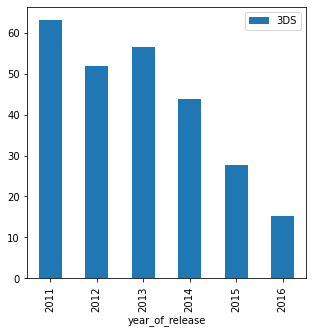

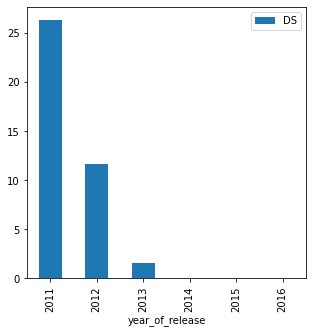

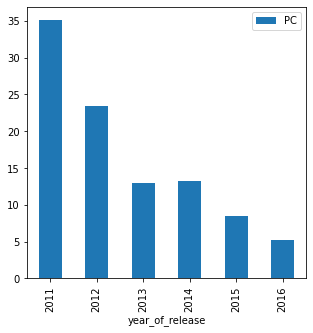

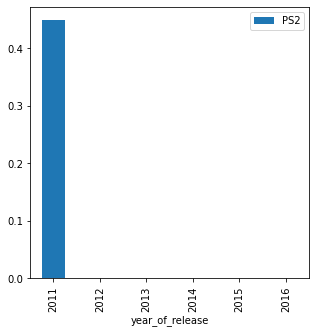

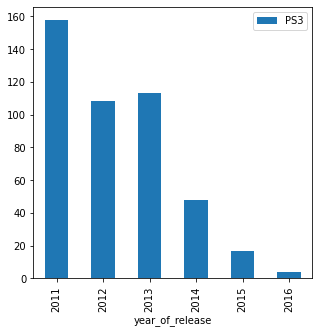

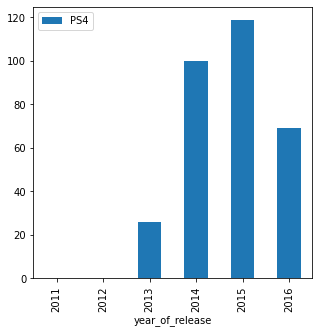

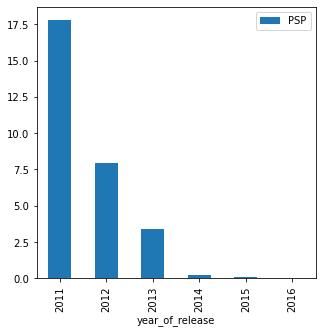

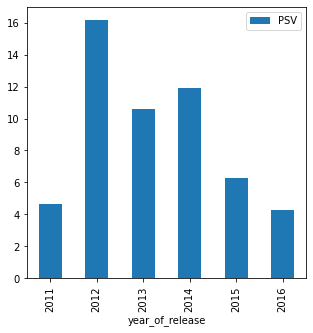

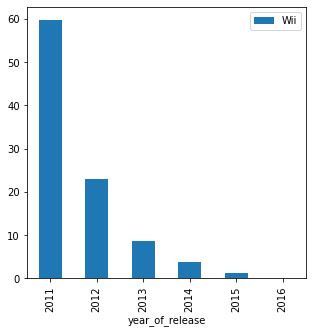

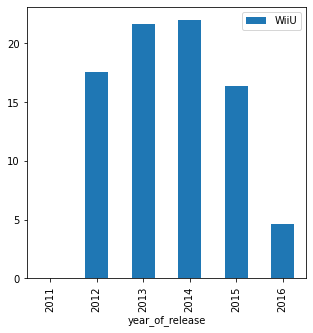

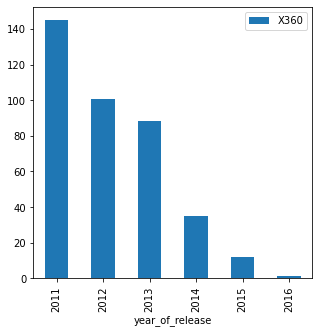

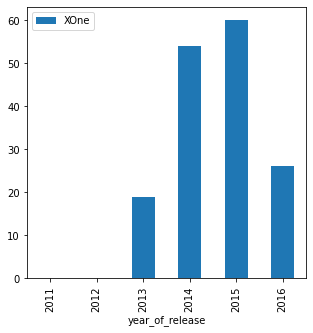

In [26]:
data_all_platforms = data_stat.pivot_table(index='year_of_release', \
                                           columns='platform', values='all_sales', \
                                           aggfunc='sum')
data_all_platforms.reset_index(inplace=True)

platforms = ['3DS', 'DS', 'PC', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

for i in platforms:
    data_all_platforms.plot(x='year_of_release', y=i, kind='bar', figsize=(5,5))


**3.4 Посмотрим, как влияют на продажи внутри одной популярной платформы (например 'PS3') отзывы пользователей и критиков.**

In [27]:
data_ps3 = data_new[(data_new['platform'] == 'PS3') & \
                    (data_new['critic_score'] != 0.0) & \
                    (data_new['user_score'] != 0.0)]
data_ps3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2012.078488,0.397849,0.369767,0.087180,0.148895,71.462209,6.732849,1.003692
std,1.025734,0.729531,0.841955,0.156563,0.328996,13.312515,1.454679,1.906585
min,2011.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.010000
25%,2011.000000,0.070000,0.040000,0.000000,0.020000,64.000000,6.000000,0.200000
50%,2012.000000,0.180000,0.140000,0.030000,0.060000,74.000000,7.100000,0.485000
75%,2013.000000,0.412500,0.382500,0.092500,0.152500,81.000000,7.800000,1.005000
max,2015.000000,7.020000,9.090000,0.980000,3.960000,97.000000,9.100000,21.050000


Числовые характеристики оценок критиков и пользователей сильно отличаются, скорей всего это, потому что пользователи не часто ставят оценки.

Зависимость продаж от оценок пользователей: 0.024950369201715592
Зависимость продаж от оценок критиков: 0.37613768367126077


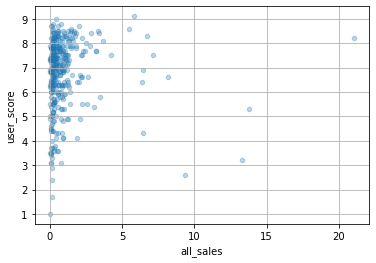

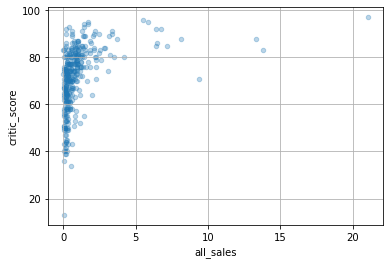

In [28]:
# диаграммы рассеяния
data_ps3.plot(x='all_sales', y='user_score', kind='scatter', grid=True, alpha=0.3)
data_ps3.plot(x='all_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3)

# корреляция
print('Зависимость продаж от оценок пользователей:', data_ps3['user_score'].corr(data_ps3['all_sales']))
print('Зависимость продаж от оценок критиков:', data_ps3['critic_score'].corr(data_ps3['all_sales']))


Оценки пользователей и критиков слабо влияют на продажи игр на платформе 'PS3', но корреляция положительная.

**3.5 Соотнеcем выводы с продажами игр на других платформах. Проверим платформы '3DS' и 'X360'.**

In [29]:
data_3ds = data_new[(data_new['platform'] == '3DS') & \
                    (data_new['critic_score'] != 0.0) & \
                    (data_new['user_score'] != 0.0)]
data_3ds.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,2012.617834,0.311146,0.213503,0.215732,0.048917,67.942675,6.940127,0.789299
std,1.639008,0.666473,0.521668,0.540312,0.113987,12.333113,1.335744,1.748637
min,2011.000000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2011.000000,0.070000,0.010000,0.000000,0.010000,60.000000,6.100000,0.140000
50%,2012.000000,0.140000,0.070000,0.050000,0.020000,69.000000,7.200000,0.320000
75%,2014.000000,0.300000,0.200000,0.190000,0.040000,77.000000,7.900000,0.640000
max,2016.000000,5.030000,4.020000,4.390000,0.910000,92.000000,9.100000,12.650000


Зависимость продаж от оценок пользователей: 0.23244358107814947
Зависимость продаж от оценок критиков: 0.3384264578906769


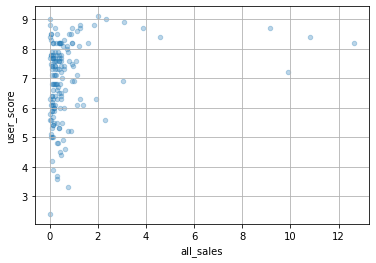

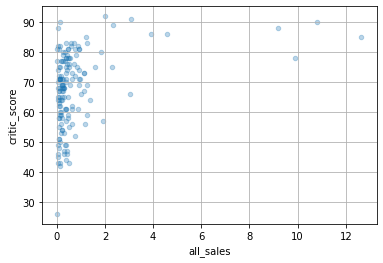

In [30]:
# диаграммы рассеяния
data_3ds.plot(x='all_sales', y='user_score', kind='scatter', grid=True, alpha=0.3)
data_3ds.plot(x='all_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3)

# корреляция
print('Зависимость продаж от оценок пользователей:', data_3ds['user_score'].corr(data_3ds['all_sales']))
print('Зависимость продаж от оценок критиков:', data_3ds['critic_score'].corr(data_3ds['all_sales']))

In [31]:
data_x360 = data_new[(data_new['platform'] == 'X360') & \
                    (data_new['critic_score'] != 0.0) & \
                    (data_new['user_score'] != 0.0)]
data_x360.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,295.000000,295.00000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,2011.945763,0.63522,0.324034,0.008814,0.091729,69.935593,6.537288,1.059797
std,0.977871,1.20475,0.625567,0.017112,0.171387,14.958420,1.469520,1.956575
min,2011.000000,0.00000,0.000000,0.000000,0.000000,19.000000,1.200000,0.010000
25%,2011.000000,0.10000,0.050000,0.000000,0.020000,61.000000,5.700000,0.190000
50%,2012.000000,0.28000,0.140000,0.000000,0.040000,74.000000,6.700000,0.480000
75%,2013.000000,0.66000,0.340000,0.010000,0.090000,80.500000,7.700000,1.090000
max,2014.000000,9.66000,5.140000,0.130000,1.410000,97.000000,8.900000,16.270000


Зависимость продаж от оценок пользователей: 0.022846157392019638
Зависимость продаж от оценок критиков: 0.3893352638493179


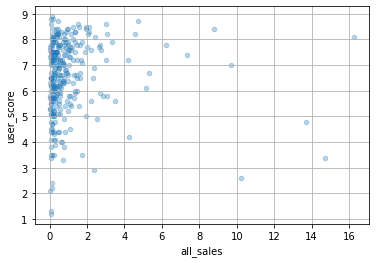

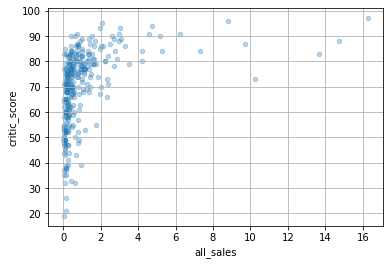

In [32]:
# диаграммы рассеяния
data_x360.plot(x='all_sales', y='user_score', kind='scatter', grid=True, alpha=0.3)
data_x360.plot(x='all_sales', y='critic_score', kind='scatter', grid=True, alpha=0.3)

# корреляция
print('Зависимость продаж от оценок пользователей:', data_x360['user_score'].corr(data_x360['all_sales']))
print('Зависимость продаж от оценок критиков:', data_x360['critic_score'].corr(data_x360['all_sales']))

**Вывод**

Рассмотрев зависимости продаж от оценок пользователей и критиков по трем платформам, можно сказать, что оценки почти не влияют на продажи. Видна очень слабая положительная зависимость. По диаграммам также заметно сосредоточение высоких оценок на продажах до 5 млн.

**3.6 Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

,genre,all_sales
0,action,446.66
8,shooter,314.25
10,sports,183.48
7,role-playing,178.28
4,platform,77.93
3,misc,75.79
6,racing,70.43
2,fighting,58.39
9,simulation,34.79
1,adventure,30.93


<AxesSubplot:xlabel='genre'>

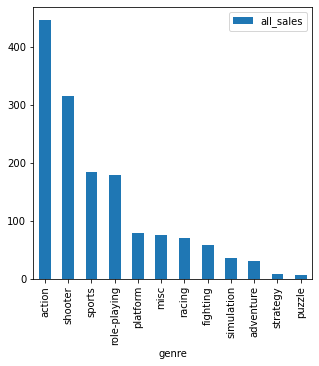

In [33]:
grouped_genres = data_new.pivot_table(index='genre', values='all_sales', aggfunc='sum')
grouped_genres.reset_index(inplace=True)

grouped_genres = grouped_genres.sort_values(['all_sales'], ascending=False)

display(grouped_genres)
grouped_genres.plot(x='genre', y='all_sales', kind='bar', figsize=(5,5))

Делаем вывод. По графику и сводной можно заметить четыре жанра с высокой продаваемостью остальные нижк (менее 100 млн копий). Пик продаж нашей выборки составляют игры жанра action, чуть меньше продаж идет от жанров sports и shooter, и и последний жанр role-playing.

In [34]:
# посмотрим на количество игр в каждом жанре

data_genres_new = data_new.pivot_table(index='genre', values='all_sales', \
                                       aggfunc=('count', 'sum', 'median'), dropna=False)
data_genres_new.reset_index(inplace=True)

data_genres_new = data_genres_new.sort_values(['count'], ascending=False)

display(data_genres_new)

,genre,count,median,sum
0,action,779,0.190,446.66
7,role-playing,244,0.215,178.28
10,sports,242,0.290,183.48
8,shooter,217,0.440,314.25
3,misc,202,0.125,75.79
1,adventure,150,0.060,30.93
2,fighting,116,0.210,58.39
6,racing,106,0.230,70.43
4,platform,83,0.260,77.93
9,simulation,67,0.150,34.79


Количество игр различается, в некоторых жанрах сильно. Самый лучший медианный показатель у жанра shooter, хоть и количество игр примерно как у болшинства жанров. А самый низкий у adventure, strategy и puzzle.

### Шаг 4. Составление портрета пользователя каждого региона 

Определим для пользователя каждого региона (NA, EU, JP):

* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для каждого пункта необходимо создать выборки (небольшие сводные) и построить графики для визуализации.
У нас 3 критерия, по которым нужно посмотреть самые высокие продажи по регионам - платформы, жанры, рейтинг ESRB.

In [35]:
# создадим функцию 

def platforms(row):
    """ 
    Функция берет в параметр наименование столбца, 
    по которому будут просчитываться суммарные продажи по платформам, жанрам и рейтингу с помощью сводной,
    сортировать эти продажи в порядке убывания и выбирать первые 5 из списка.
    Далее строятся графики.
    
    """
    # задаем параметры для графиков (размер и количество)
    figure, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # создаем цикл для столбцов группировки и их графиков
    for i, j in zip(list(['platform','genre','rating']), ax):
        platforms_top = data_stat.pivot_table(index=i, values=row, aggfunc='sum')\
        .sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        
        display(platforms_top)
        sns.barplot(data=platforms_top, x=i, y=row, ax=j)
        

**Портрет пользователя Северной Америки**

,platform,na_sales
0,X360,228.18
1,PS3,168.96
2,PS4,108.74
3,XOne,93.12
4,3DS,82.83


,genre,na_sales
0,action,234.41
1,shooter,194.45
2,sports,108.70
3,role-playing,83.78
4,misc,69.81


,rating,na_sales
0,M,309.32
1,E,170.25
2,undefind,124.03
3,E10+,119.95
4,T,109.62


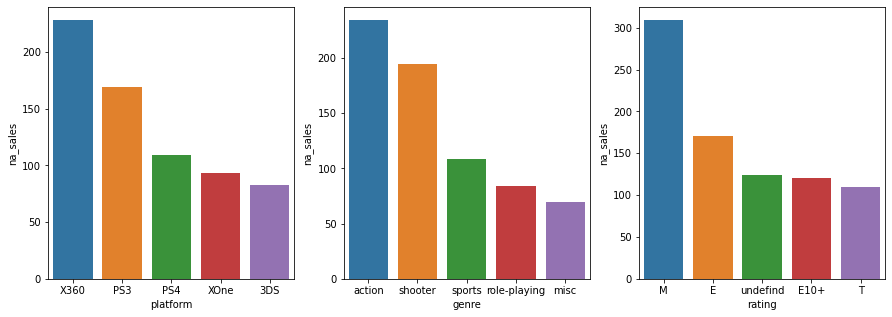

In [36]:
platforms('na_sales')

* самые популярные платформы - X360, PS3, PS4, XOne, 3DS
* жанры - action, sports, shooter, misc, role-playing
* рейтинг - Е (для всех), М (для взрослых), Т (для подростков), Е10+ (для всех от 10 лет) и неопределенный.

**Портрет пользователя Европы**

,platform,eu_sales
0,PS3,164.15
1,PS4,141.09
2,X360,117.87
3,3DS,61.46
4,PC,57.38


,genre,eu_sales
0,action,202.17
1,shooter,148.05
2,sports,88.67
3,role-playing,62.30
4,racing,40.58


,rating,eu_sales
0,M,251.40
1,E,141.93
2,undefind,116.67
3,T,83.37
4,E10+,79.88


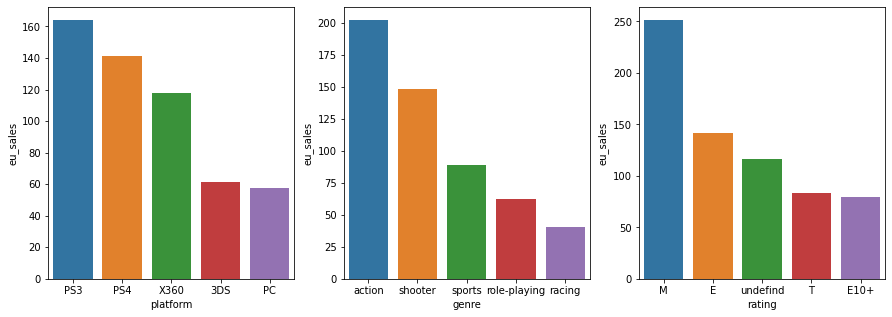

In [37]:
platforms('eu_sales')

* самые популярные платформы - PS3, Wii, X360, DS, PC
* жанры - action, sports, shooter, misc, racing
* рейтинг - Е (для всех), М (для взрослых), Т (для подростков), неопределенный, Е10+ (для всех от 10 лет).

**Портрет пользователя Японии**

,platform,jp_sales
0,3DS,100.62
1,PS3,49.40
2,PSP,24.28
3,PSV,21.84
4,PS4,15.96


,genre,jp_sales
0,role-playing,79.87
1,action,63.63
2,misc,17.85
3,fighting,12.38
4,platform,12.13


,rating,jp_sales
0,undefind,138.46
1,E,36.68
2,T,33.39
3,M,26.15
4,E10+,11.23


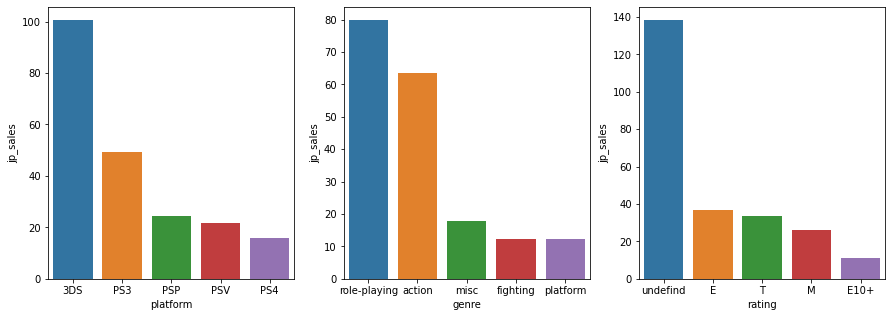

In [38]:
platforms('jp_sales')

* самые популярные платформы - 3DS, PS3, PSP, PSV, PS4
* жанры - role-playing, action, misc, fighting, platform
* рейтинг - неопределенный, Е (для всех), Т (для подростков), Е10+ (для всех от 10 лет), М (для взрослых)

**Вывод**

Доли продаж по регионам отличаются. Самые высокие продажи показаны в Северной Америке, а самые низкие из трех рассматриваемых регионов в Японии.

Самые популярные жанры - action, role-playing.

Сюдя по графикам и данным сводних рейтинг ESRB влияет на продажи. Например в Америке и Европе рейтинги Е (для всех), М (для взрослых), Т (для подростков) также высоки как и продажи игр по жанрам action, sports, shooter. 

### Шаг 5. Проверьте гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

In [39]:
# отфильтруем оценки пользователей по необходимым платформам

xbox_one_data = df[(df['year_of_release'] >= 2011) & (df['platform'] >= 'XOne')]['user_score']
pc_data = df[(df['year_of_release'] >= 2011) & (df['platform'] >= 'PC')]['user_score']

In [40]:
# посчитаем средние оценки пользователей

print('Средние оценки Xbox One:', xbox_one_data.mean())
print('Средние оценки PC:', pc_data.mean())

Средние оценки Xbox One: 4.805263157894736
Средние оценки PC: 3.6761933174224257


Сформулируем нулевую и алтернативную гипотезы: 

Нулевая - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Алтернативная - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [41]:
alpha = .01

results = st.ttest_ind(
    xbox_one_data, 
    pc_data)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  7.695661405610139e-07
Отвергаем нулевую гипотезу


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.**

In [42]:
# отфильтруем оценки пользователей по жанрам

action_data = df[(df['year_of_release'] >= 2011) & (df['genre'] >= 'action')]['user_score']
sports_data = df[(df['year_of_release'] >= 2011) & (df['genre'] >= 'sports')]['user_score']

In [43]:
# посчитаем средние оценки пользователей

print('Средние оценки Action:', action_data.mean())
print('Средние оценки Sports:', sports_data.mean())

Средние оценки Action: 3.3542941757156877
Средние оценки Sports: 3.497047244094487


Сформулируем нулевую и алтернативную гипотезы: 

Нулевая - Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») одинаковые.

Алтернативная - Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные.

In [44]:
alpha = .01

results = st.ttest_ind(
    action_data, 
    sports_data, equal_var = False)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.3421744184488458
Не получилось отвергнуть нулевую гипотезу


Формулировка гипотез:
- в первом случае мы создали альтернативную гипотезу (противоположную основной), за нулевую взяли основную гипотезу
- во втором случае наоборот, основная гипотеза - альтернативная, нулевую создаем исходя из обратного

Итого получаем:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - ОТВЕРГАЕМ. Количество игр на первой платформе в разы меньше, чем на второй, возможно это и есть причина такой разницы.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшенигры) и Sports (англ. «спортивные соревнования») разные - ПОДТВЕРЖДАЕМ. Также, скорей всего, дело в количестве игр в разных жанровых категориях.


### Шаг 6. Общий вывод 

На текущий момент мы можем отметить несколько закономерностей, влияющих на успешность игры:
* Регион. Продажи, например, в Америке и Европе значительно выше чем в Японии.
* Оценки и рейтинг. Зависимсоть продаж от оценок очень низкая. Поэтому не стоит опираться на этот критерий при планировании продаж. А вот рейтинг ESRB показывает обратное. Можно будет проработать целевую аудиторию, на какую возрастную категорию сделать больший уклон.
* Платформы. От платформы зависит многое, но в определенный период. В среднем каждая игровая платформа держится 5-7 лет, затем на рынок приходят новые платформы. Стоит поработать над обновленными платформами.
* Жанры. Самые высокие продажи по жанрам action, sports, shooter, role-playing. Возможно стоит еще рассмотреть смежные жанры.